In [203]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [204]:
housing = pd.read_csv('train.csv')

In [205]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [206]:
housing.shape

(1460, 81)

In [207]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [208]:
# By default, for each set of duplicated values, the first occurrence is set on False and all others are True.
housing.duplicated().sum()

0

In [209]:
#Find the count of Rows and Columns having all data as NULL
housing.isnull().all(axis=1).sum()
housing.isnull().all(axis=0).sum()

0

In [210]:
#Percentage of null value in the Dataset
pd.set_option('display.max_rows', None)# to display all the rows
100*housing.isnull().mean().sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [211]:
#there are columns which we can remove as they have null value more than 30%
housing.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)
housing.shape

(1460, 76)

In [212]:
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    housing[i].fillna("none", inplace=True)

In [213]:
# We will replace the null with median for LotFrontage MasVnrArea and GarageYrBlt columns
housing["LotFrontage"].fillna(housing["LotFrontage"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace=True)

In [214]:
# Filling the Electrical with the mode
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

In [215]:
#Validating the null values again
100*housing.isnull().mean().sort_values(ascending=False)

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
YearBuilt        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

In [216]:
# Lets drop the ID column as it cannot be used for analysis
housing=housing.drop(['Id'], axis=1)

In [217]:
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
housing['Total_sqr_footage'] = (housing['BsmtFinSF1'] + housing['BsmtFinSF2'] + housing['1stFlrSF'] + housing['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
housing['Total_Bathrooms'] = (housing['FullBath'] + (0.5 * housing['HalfBath']) + housing['BsmtFullBath'] + (0.5 * housing['BsmtHalfBath']))
#Creating derived column for total porch area 
housing['Total_porch_sf'] = (housing['OpenPorchSF'] + housing['3SsnPorch'] + housing['EnclosedPorch'] + housing['ScreenPorch'] + housing['WoodDeckSF'])


In [218]:
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
housing.drop(extraCols,axis=1,inplace=True)
housing.shape#

(1460, 65)

In [219]:
ninty_percent = 1460*0.90 #1460 is the total number of rows
ninty_percent

1314.0

In [220]:
dropCols = [] 
for i in housing.columns :
    if housing[i].value_counts().max() >= ninty_percent:
        dropCols.append(i)
print(dropCols)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [221]:
housing.drop(dropCols,axis=1,inplace=True)
housing.shape

(1460, 50)

In [222]:
housing['Total_Age']=housing['YrSold']-housing['YearBuilt']
housing['Garage_age'] = housing['YrSold'] - housing['GarageYrBlt']
housing['Remodel_age'] = housing['YrSold'] - housing['YearRemodAdd']
#Also lets drop out variables like GarageYrBlt and YearRemodAdd as we are already calculating the number of years
drop_cols = ['GarageYrBlt','YearRemodAdd']
housing.drop(labels = drop_cols, axis = 1, inplace=True) #Dropping the columns added in the list
housing.shape

(1460, 51)

In [223]:
category_cols = []
numerical_cols = []
for i in housing.columns :
    if housing[i].dtype == "object":
        category_cols.append(i)
    else:
        numerical_cols.append(i)
print("Categorical Columns: ")
print(category_cols)
print("Numerical Columns: ")
print(numerical_cols)

Categorical Columns: 
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']
Numerical Columns: 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


### Univariate Analysis of the Catagorical columns

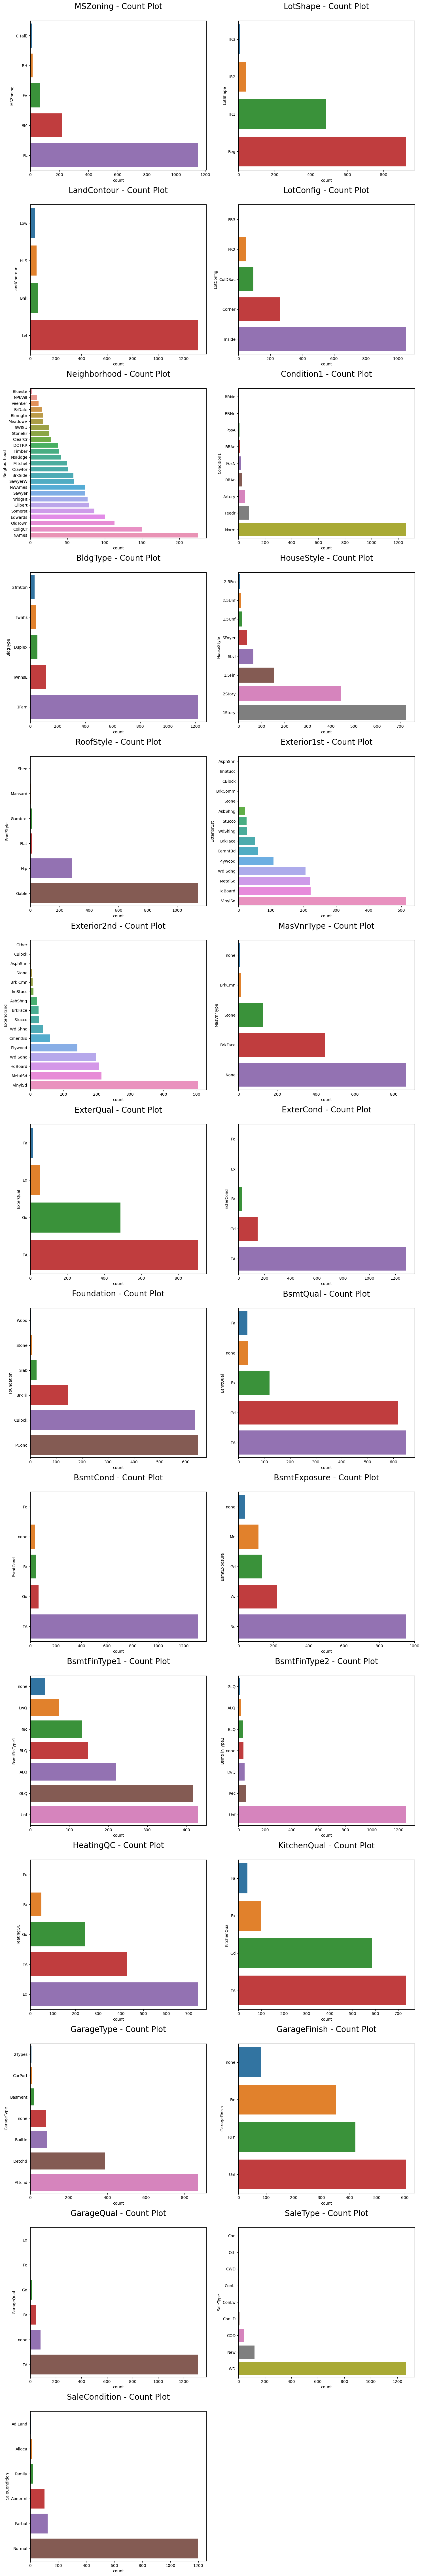

In [224]:
#Lets plot all the categorical columns 
plt.figure(figsize=(15,110))#The size of the plot
c=0
for i in category_cols:
    c=c+1
    plt.subplot(17,2,c)
    sns.countplot(y=housing[str(i)],order=housing[str(i)].value_counts().sort_values().index)
    plt.title(str(i)+" - Count Plot\n",fontsize=20)#The title of the plot
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

### Checking Outliers | Univariate Analysis of the Continous columns

In [225]:
#Lets first observe the data in terms of percentile
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt   MasVnrArea    BsmtUnfSF  TotalBsmtSF    GrLivArea  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   103.117123   567.240411  1057.429452  1515.463699  ...   
std      30.202904   180.731373   441.866955   438.705324   525.480383  ...   
min    1872.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%    1954.000000     0.000000   223.000000   795.750000  1129.500000  ...   
50%    1973.000000     0.000000   477.500000   991.500000  1464.000000  ...   
75%    2000.000000   164.250000   808.000000  1298.250000  1776.750000  ...   
90%    2006.000000   335.000000  1232.000000  1602.200000  2158.300000  ...   
95%    2007.000000   456.000000  1468.000000  1753.000000  2466.100000  ...   
99%    2009.000000   791.280000  1797.050000  2155.050000  3123.480000  ...   
max    2010.000000  1600.000000  2336.000000  6110.000000  5642.000000  ...   

        GarageArea       MoSold       YrSold      SalePrice  \
count  1460.000000  1460.000000  1460.000000    1460.000000   
mean    472.980137     6.321918  2007.815753  180921.195890   
std     213.804841     2.703626     1.328095   79442.502883   
min       0.000000     1.000000  2006.000000   34900.000000   
25%     334.500000     5.000000  2007.000000  129975.000000   
50%     480.000000     6.000000  2008.000000  163000.000000   
75%     576.000000     8.000000  2009.000000  214000.000000   
90%     757.100000    10.000000  2010.000000  278000.000000   
95%     850.100000    11.000000  2010.000000  326100.000000   
99%    1002.790000    12.000000  2010.000000  442567.010000   
max    1418.000000    12.000000  2010.000000  755000.000000   

       Total_sqr_footage  Total_Bathrooms  Total_porch_sf    Total_Age  \
count        1460.000000      1460.000000     1460.000000  1460.000000   
mean         1999.808219         2.210616      181.329452    36.547945   
std           773.992942         0.785399      156.656097    30.250152   
min           334.000000         1.000000        0.000000     0.000000   
25%          1493.000000         2.000000       45.000000     8.000000   
50%          1863.500000         2.000000      164.000000    35.000000   
75%          2383.500000         2.500000      266.000000    54.000000   
90%          3023.100000         3.500000      382.000000    84.000000   
95%          3334.150000         3.500000      472.150000    91.000000   
99%          4107.510000         4.000000      670.000000   110.410000   
max         11286.000000         6.000000     1027.000000   136.000000   

        Garage_age  Remodel_age  
count  1460.000000  1460.000000  
mean     29.226712    22.950000  
std      24.034844    20.640653  
min       0.000000    -1.000000  
25%       7.000000     4.000000  
50%      28.000000    14.000000  
75%      46.000000    41.000000  
90%      61.000000    56.000000  
95%      78.000000    58.000000  
99%      90.000000    60.000000  
max     107.000000    60.000000  

[11 rows x 24 columns]

In [226]:
outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_sqr_footage','Total_porch_sf']
for i in outlier:
    qnt = housing[i].quantile(0.98)#removing data above 98 percentile
    housing = housing[housing[i] < qnt]

In [227]:
housing.shape

(1290, 51)

### Bivariate Analysis of the Categorical columns

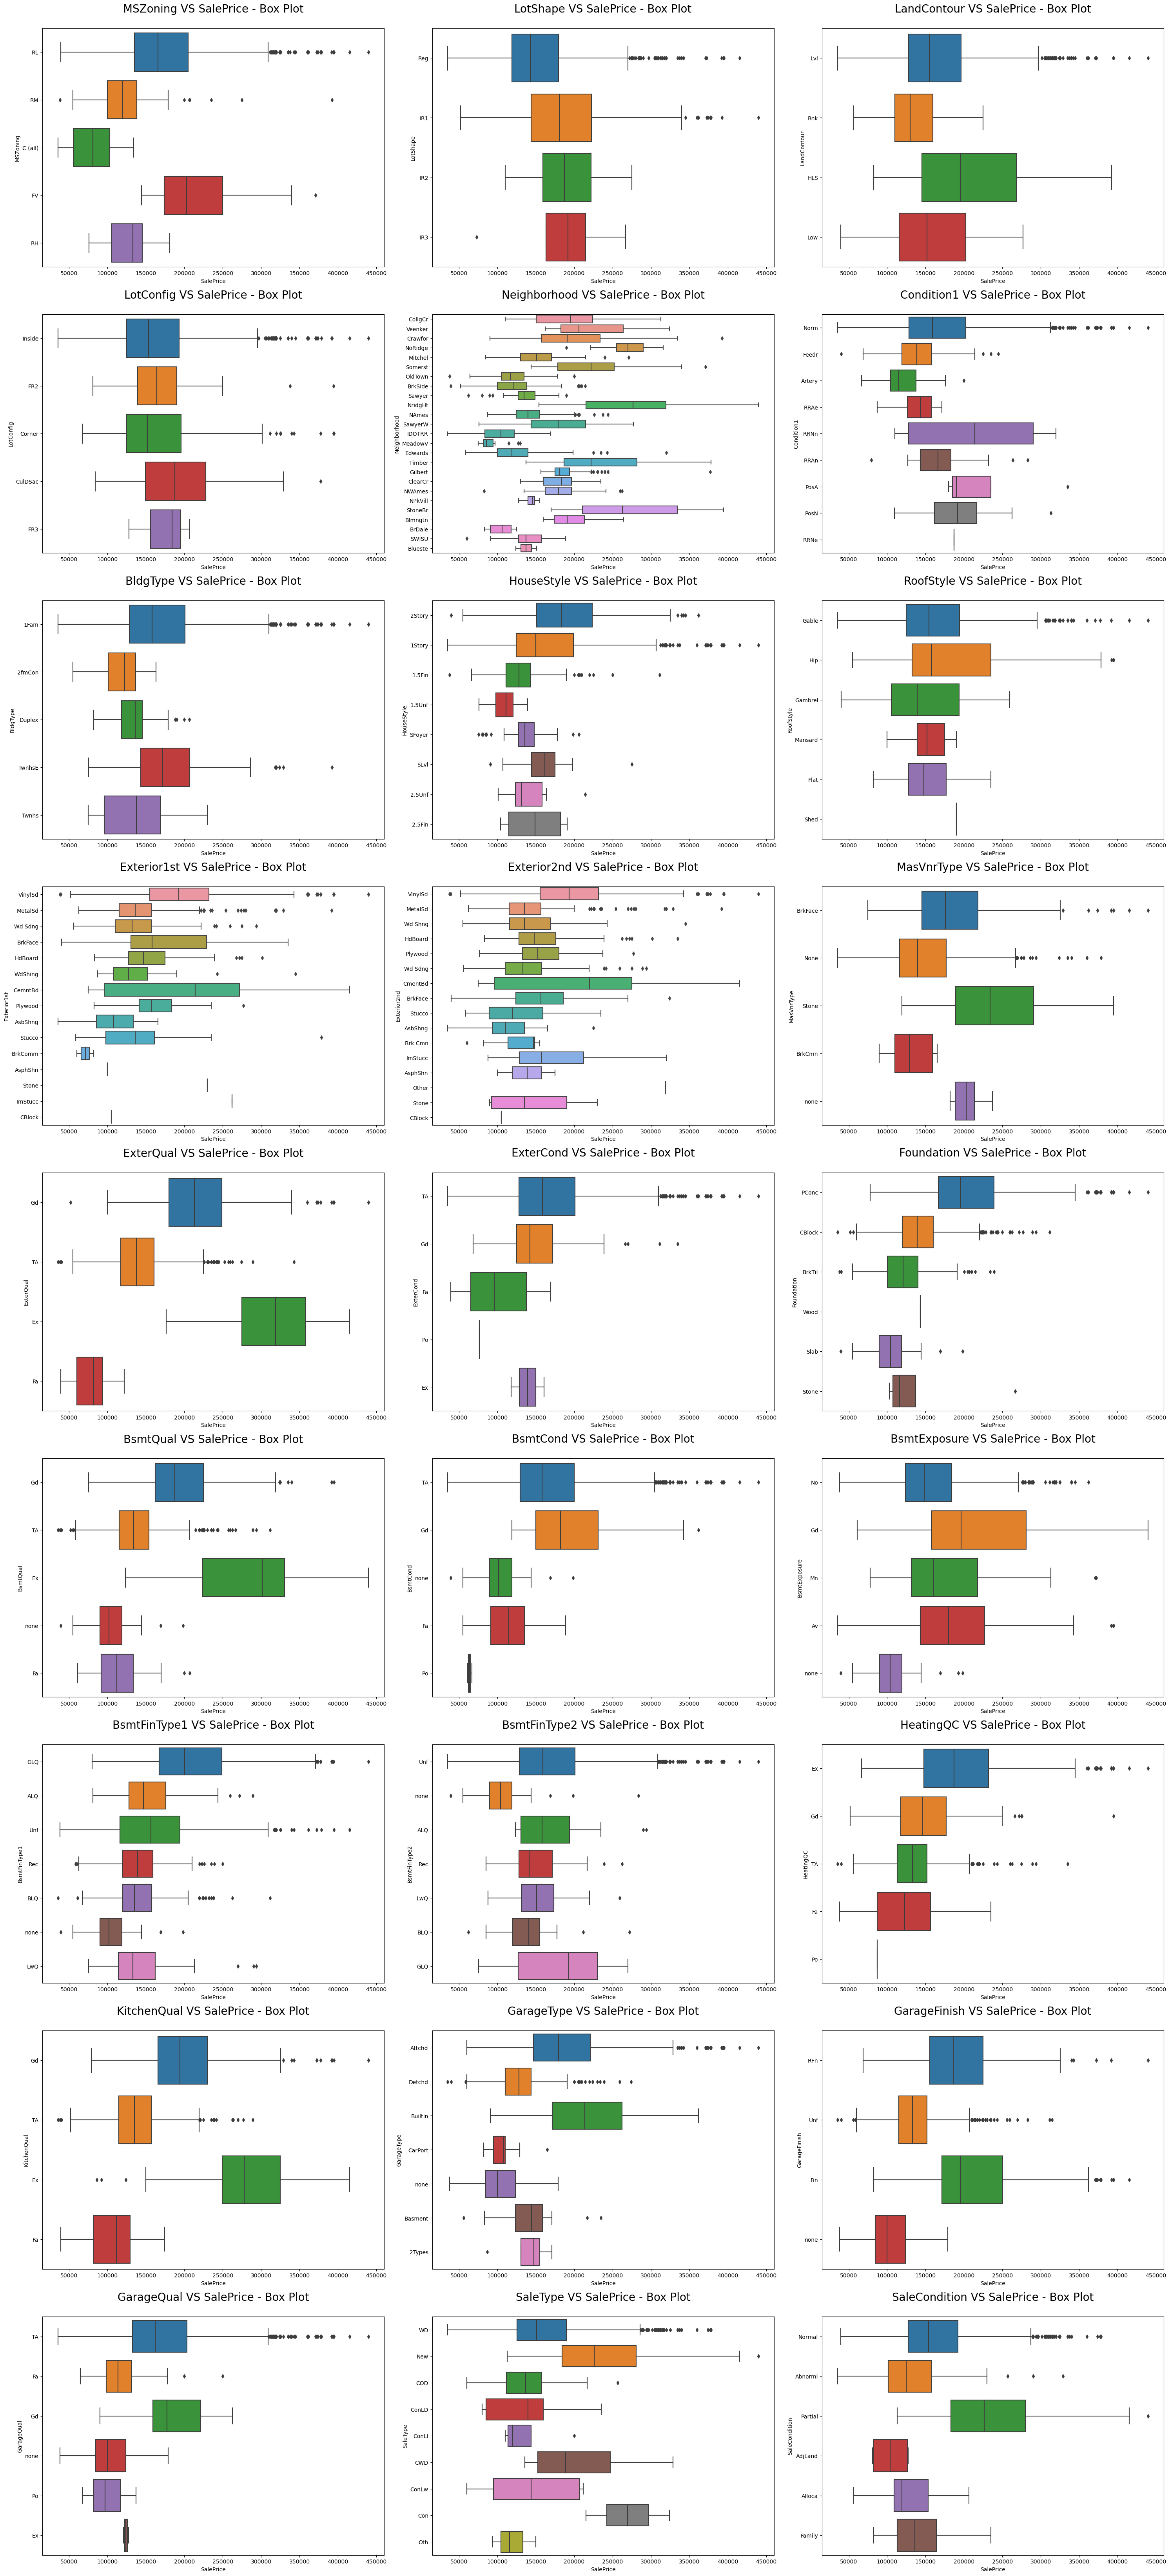

In [228]:
#Lets plot SalePrice against all the categorical columns
plt.figure(figsize=(30,80))#The size of the plot
c=0
for i in category_cols:
    c=c+1
    plt.subplot(11,3,c)
    sns.boxplot(x = 'SalePrice', y = housing[str(i)], data = housing)
    plt.title(str(i)+" VS SalePrice - Box Plot\n",fontsize=20)#The title of the plot    
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

### Bivariate Analysis of the Continous columns

In [229]:
important_num_cols = list(housing.corr()["SalePrice"][(housing.corr()["SalePrice"]>0.50) | (housing.corr()["SalePrice"]<-0.50)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_Age',
 'Garage_age',
 'Remodel_age']

<Figure size 7000x9000 with 0 Axes>

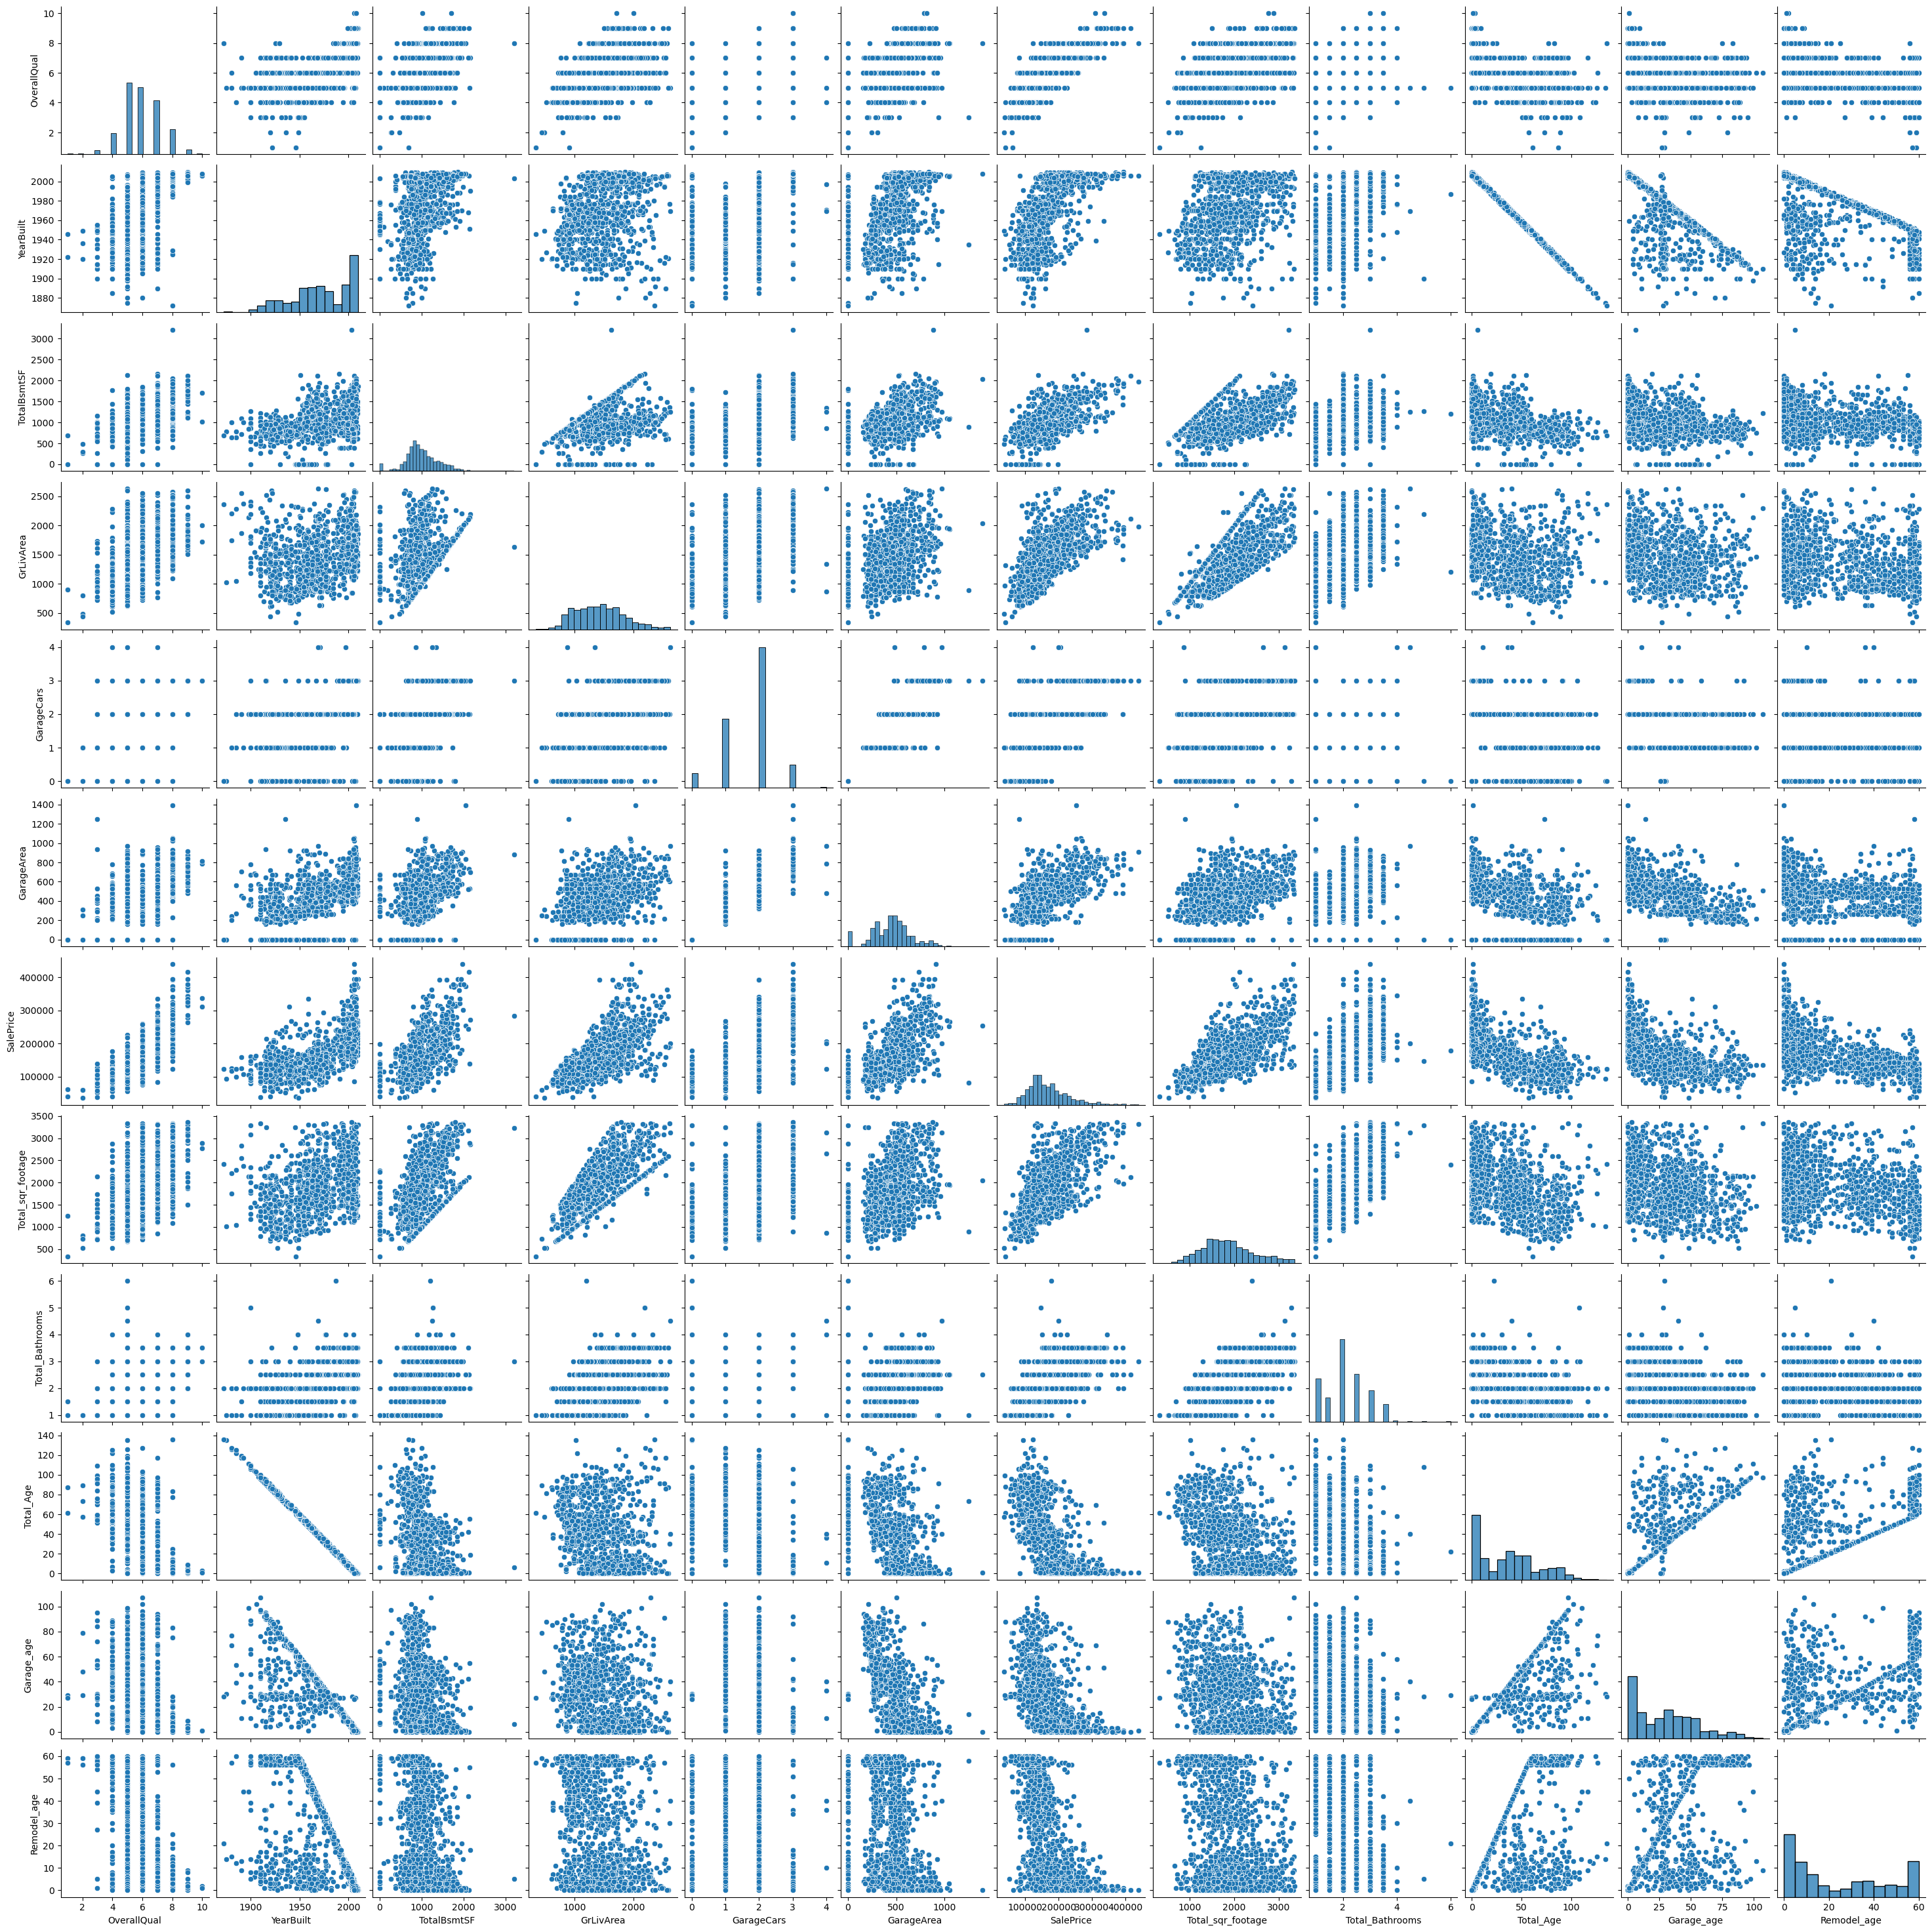

In [230]:
plt.figure(figsize = (70, 90))
sns.pairplot(housing, vars= important_num_cols)
plt.show()

##### Observations:
1. There is a pattern formed between total **`Total_age`** and **`Remodel_age`**
2. We can observe that the **`SalesPrice`** increses with the increase of **`Total_sqr_footage`** and that is natural
3. We can observe that the **`SalesPrice`** increses with the increase of **`GrLivArea`**

### Multivariate Analysis of the all columns using Heat Map

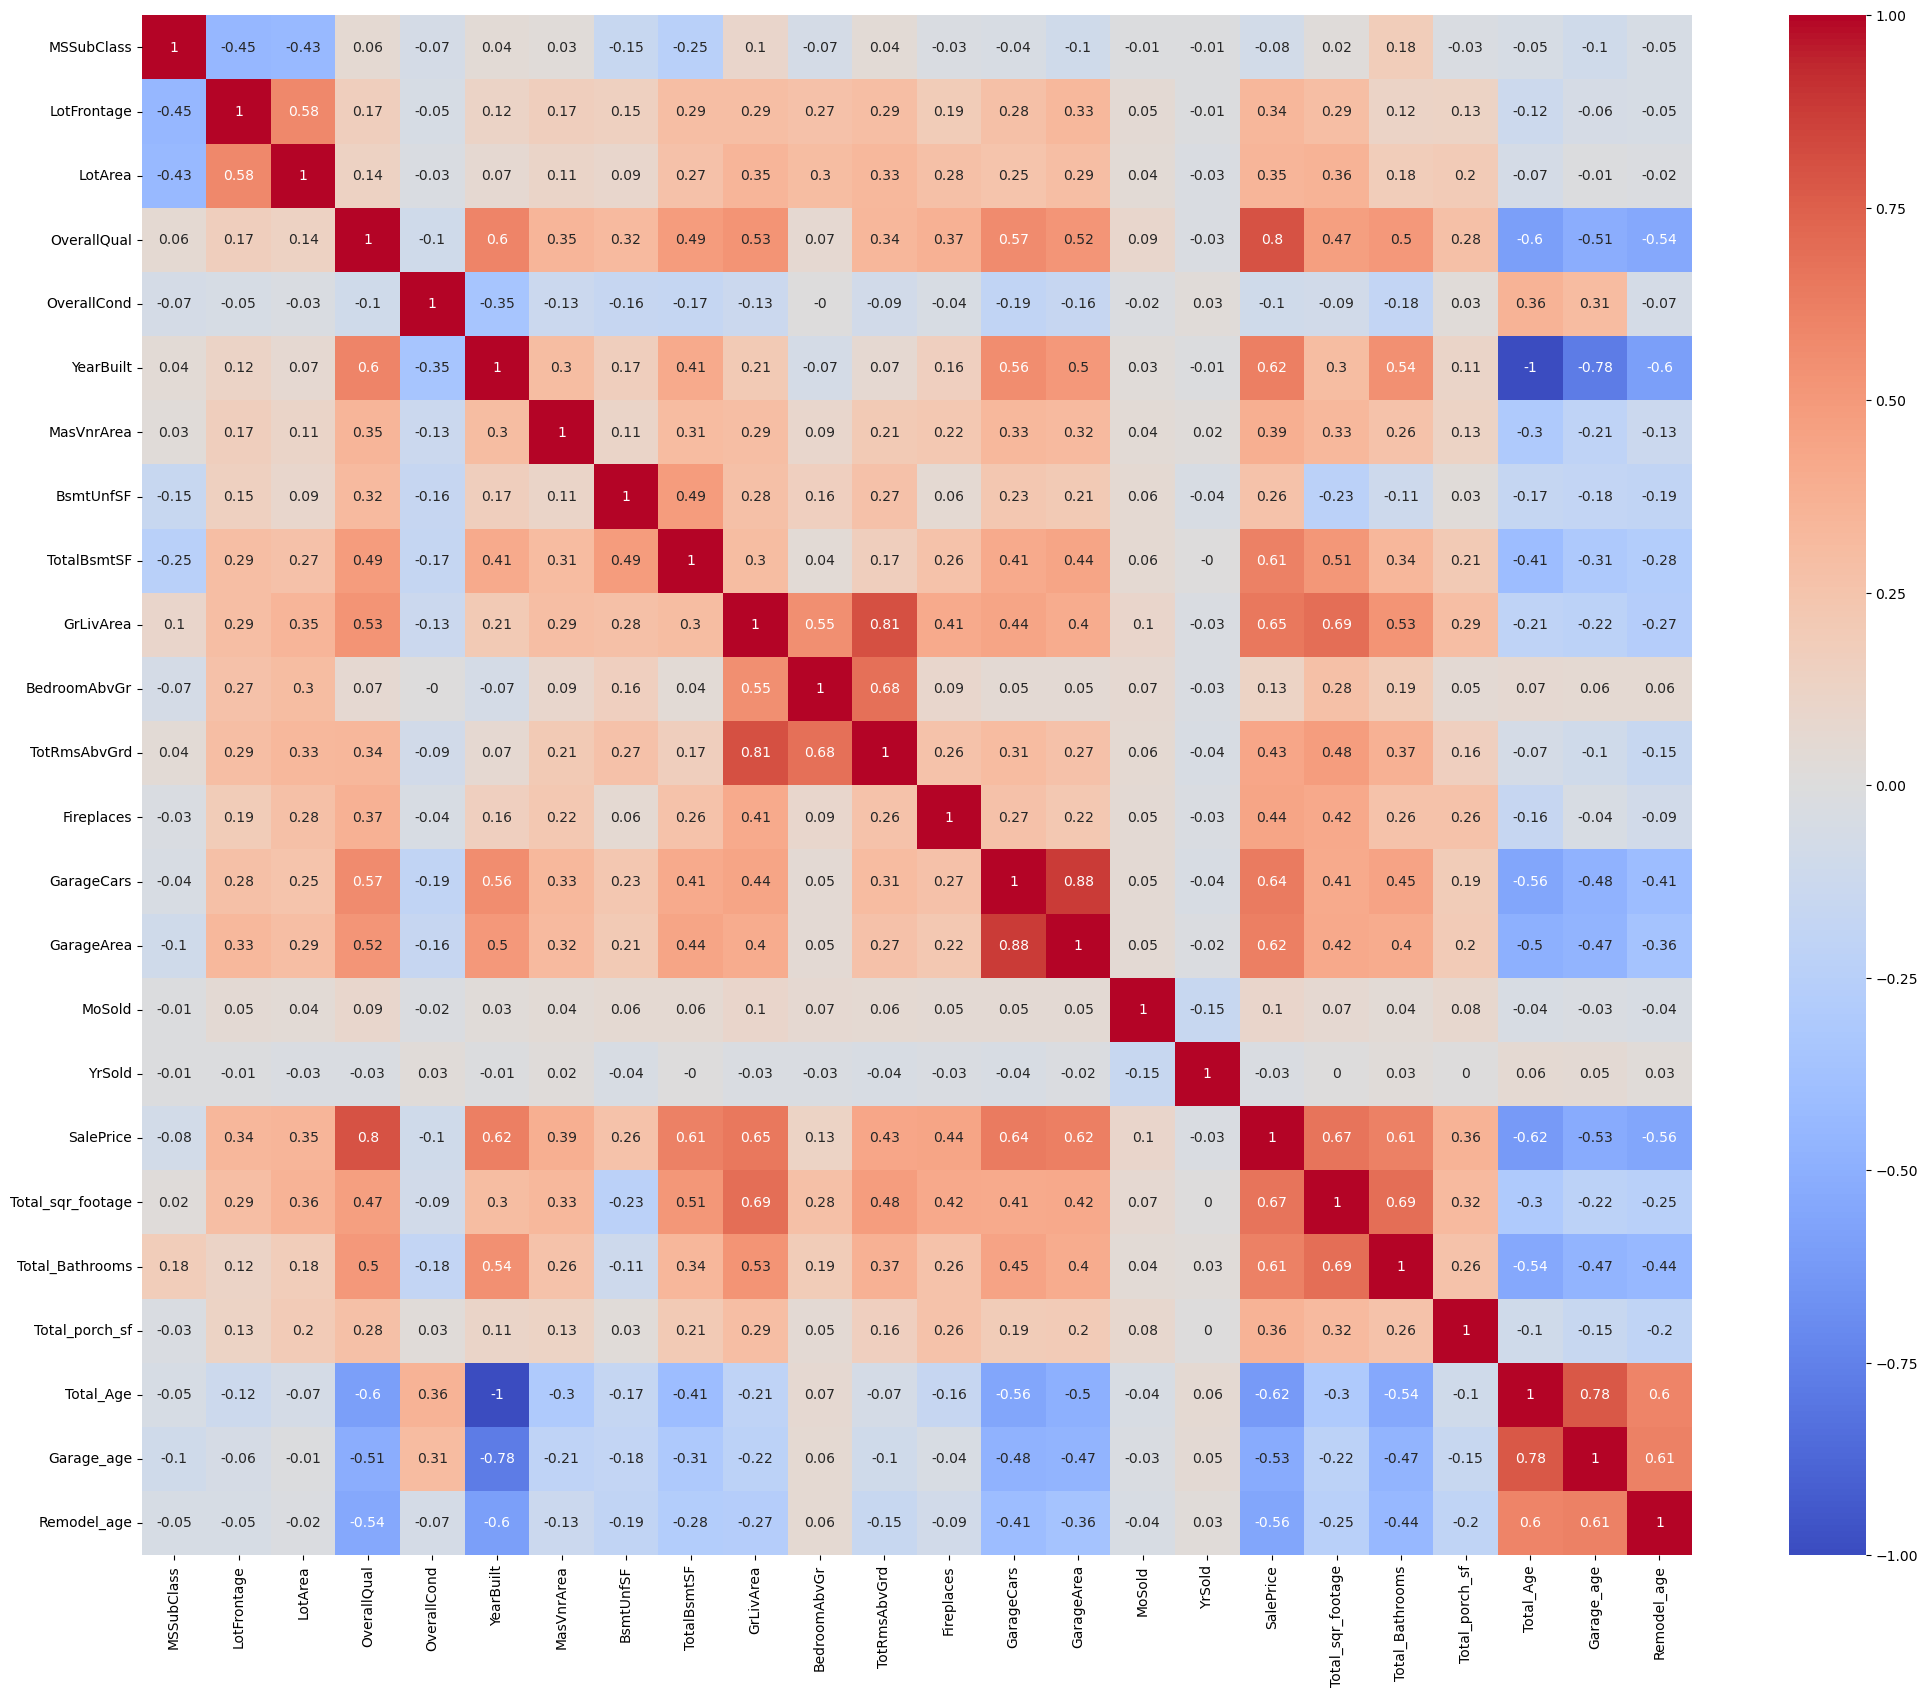

In [231]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(housing.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

##### Observations:
1. **`GarageArea`** and **`GarageCars`** have a strong correlation since both are describing the size.
2. **`TotRmsAbvGrd`** and **`GrLivArea`** have a strong correlation
3. **`GarageAge`** and **`TotalAge`** also have a strong correlation, could be because many garage had been build in the beginning itself
**Since these pairs have high correlation , we have to drop any 1 during model preparation with the help of p-value and VIF** 

In [232]:
#Also lets find out which variables has high correlation with SalesPrice
housing.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice            1.00
OverallQual          0.80
Total_sqr_footage    0.67
GrLivArea            0.65
GarageCars           0.64
YearBuilt            0.62
GarageArea           0.62
TotalBsmtSF          0.61
Total_Bathrooms      0.61
Fireplaces           0.44
TotRmsAbvGrd         0.43
MasVnrArea           0.39
Total_porch_sf       0.36
LotArea              0.35
LotFrontage          0.34
BsmtUnfSF            0.26
BedroomAbvGr         0.13
MoSold               0.10
YrSold              -0.03
MSSubClass          -0.08
OverallCond         -0.10
Garage_age          -0.53
Remodel_age         -0.56
Total_Age           -0.62
Name: SalePrice, dtype: float64

##### Observations:
We can clearly observe that the **`SalesPrice`** is mostly corelated with variables like **`OverallQual`**, **`GrLivArea`**, **`Total_sqr_footage`** and **`GarageCars`**

### Data Preparation for Modelling


In [233]:
#add dummy column for categorical columns.
housing = pd.get_dummies(housing,drop_first=True)
housing.info()#displaying the updated Datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1458
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(165)
memory usage: 492.1 KB


In [234]:
#Lets check the updated Dataset
housing.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  SaleType_ConLI  \
0       196.0        150          856       1710  ...               0   
1         0.0        284         1262       1262  ...               0   
2       162.0        434          920       1786  ...               0   
3         0.0        540          756       1717  ...               0   
4       350.0        490         1145       2198  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 189 columns]

In [235]:
housing.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1290.000000  1290.000000   1290.000000  1290.000000  1290.000000   
mean     57.414729    67.135659   9172.652713     5.957364     5.575194   
std      43.229350    17.234819   3382.298199     1.287481     1.106160   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
25%      20.000000    60.000000   7200.000000     5.000000     5.000000   
50%      50.000000    69.000000   9100.000000     6.000000     5.000000   
75%      70.000000    75.000000  11002.250000     7.000000     6.000000   
max     190.000000   120.000000  21930.000000    10.000000     9.000000   

         YearBuilt   MasVnrArea    BsmtUnfSF  TotalBsmtSF    GrLivArea  ...  \
count  1290.000000  1290.000000  1290.000000  1290.000000  1290.000000  ...   
mean   1970.429457    81.151163   563.310078  1004.504651  1424.022481  ...   
std      30.079183   131.331451   433.622435   380.443649   412.074577  ...   
min    1872.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%    1952.000000     0.000000   219.250000   780.000000  1098.250000  ...   
50%    1971.500000     0.000000   484.500000   953.000000  1395.500000  ...   
75%    2000.000000   136.000000   803.750000  1218.750000  1700.750000  ...   
max    2010.000000   640.000000  2121.000000  3206.000000  2634.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1290.000000     1290.000000   1290.000000   1290.000000   
mean         0.003101        0.003876      0.074419      0.002326   
std          0.055620        0.062161      0.262553      0.048187   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1290.000000            1290.000000           1290.000000   
mean      0.873643               0.003101              0.006977   
std       0.332380               0.055620              0.083267   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1290.000000           1290.000000            1290.000000  
mean               0.014729              0.828682               0.075969  
std                0.120511              0.376933               0.265051  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 189 columns]

In [236]:
housing.shape

(1290, 189)

In [237]:
housing = housing.round(decimals = 2)

### Creating Model

In [238]:
import sklearn
from sklearn.model_selection import train_test_split #for spliting the data in terms of train and test
from sklearn.preprocessing import MinMaxScaler #for performing minmax scaling on the continous variables of training data
from sklearn.feature_selection import RFE #for performing automated Feature Selection
from sklearn.linear_model import LinearRegression #to build linear model
from sklearn.linear_model import Ridge #for ridge regularization
from sklearn.linear_model import Lasso #for lasso regularization
from sklearn.model_selection import GridSearchCV #finding the optimal parameter values
from sklearn.metrics import r2_score #for calculating the r-square value
import statsmodels.api as sm #for add the constant value
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF
from sklearn.metrics import mean_squared_error #for calculating the mean squared error

In [262]:
df_train,df_test = train_test_split(housing, train_size = 0.7, random_state = 100)
df_train.shape

(902, 189)

In [263]:
df_test.shape

(388, 189)

In [264]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

In [265]:
#Lets extract the numerical columns from the df_train
train_numerical_col = []
for i in df_train.columns :
    if df_train[i].dtype != "uint8":
        train_numerical_col.append(i)
print(train_numerical_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [266]:
Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[train_numerical_col] = Scaler.fit_transform(df_train[train_numerical_col])

In [267]:
#Inspect the data in percentile after min-max Scaling
df_train[train_numerical_col].describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  902.000000   902.000000  902.000000   902.000000   902.000000   
mean     0.212860     0.468499    0.378431     0.550505     0.513145   
std      0.244419     0.166552    0.162891     0.145787     0.159550   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.393939    0.279812     0.444444     0.428571   
50%      0.176471     0.484848    0.373222     0.555556     0.428571   
75%      0.294118     0.545455    0.467560     0.666667     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  MasVnrArea   BsmtUnfSF  TotalBsmtSF   GrLivArea  ...  \
count  902.000000  902.000000  902.000000   902.000000  902.000000  ...   
mean     0.710555    0.127421    0.265488     0.313282    0.476659  ...   
std      0.217767    0.210839    0.202934     0.121923    0.179894  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      0.572464    0.000000    0.102074     0.243294    0.339348  ...   
50%      0.717391    0.000000    0.228901     0.296943    0.469565  ...   
75%      0.927536    0.205556    0.383310     0.378665    0.598152  ...   
max      1.000000    1.000000    1.000000     1.000000    1.000000  ...   

       GarageArea      MoSold      YrSold   SalePrice  Total_sqr_footage  \
count  902.000000  902.000000  902.000000  902.000000         902.000000   
mean     0.323455    0.478129    0.454545    0.328326           0.506899   
std      0.144953    0.245623    0.328977    0.150592           0.195825   
min      0.000000    0.000000    0.000000    0.000000           0.000000   
25%      0.221583    0.295455    0.250000    0.227802           0.368926   
50%      0.332014    0.454545    0.500000    0.295756           0.486612   
75%      0.405755    0.636364    0.750000    0.397068           0.620000   
max      1.000000    1.000000    1.000000    1.000000           1.000000   

       Total_Bathrooms  Total_porch_sf   Total_Age  Garage_age  Remodel_age  
count       902.000000      902.000000  902.000000  902.000000   902.000000  
mean          0.223947        0.297030    0.277659    0.286031     0.400148  
std           0.148027        0.235572    0.221172    0.228625     0.350900  
min           0.000000        0.000000    0.000000    0.000000     0.000000  
25%           0.100000        0.080882    0.058824    0.074766     0.066667  
50%           0.200000        0.284007    0.272059    0.271028     0.266667  
75%           0.300000        0.455882    0.419118    0.439252     0.733333  
max           1.000000        1.000000    1.000000    1.000000     1.000000  

[8 rows x 24 columns]

In [268]:
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train 


### Model 1 - Automated Process using RFE

In [269]:
#Fit the Model
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 86),
 ('LotFrontage', False, 91),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 33),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 64),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 38),
 ('MoSold', False, 95),
 ('YrSold', True, 1),
 ('Total_sqr_footage', False, 22),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('Total_Age', True, 1),
 ('Garage_age', False, 19),
 ('Remodel_age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 13),
 ('MSZoning_RL', False, 6),
 ('MSZoning_RM', False, 12),
 ('LotShape_IR2', False, 58),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 84),
 ('LandContour_HLS', False, 4),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', False, 50),
 ('LotConfig_CulDSac', False, 35),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR

In [270]:
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces', 'GarageCars',
       'YrSold', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age',
       'Remodel_age', 'MSZoning_FV', 'LotShape_IR3', 'LandContour_Low',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior1st_Brk

In [271]:
#List of columns NOT selected by RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageArea',
       'MoSold', 'Total_sqr_footage', 'Garage_age', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_2fmCon', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Shed', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing

In [272]:
X_train_rfe = X_train[Rfe_Cols] #X_train_rfe will now have all the RFE selected features
X_train_rfe = sm.add_constant(X_train_rfe) # adding the constant c to the variables to form the equation y = mx + c
X_train_rfe.shape

(902, 95)

In [273]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     119.1
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        11:22:48   Log-Likelihood:                 1593.4
No. Observations:                 902   AIC:                            -3017.
Df Residuals:                     817   BIC:                            -2608.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [274]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

Features    VIF
88          GarageQual_TA    inf
89        GarageQual_none    inf
55     Exterior2nd_CBlock    inf
14              Total_Age    inf
68          BsmtQual_none    inf
69          BsmtCond_none    inf
11                 YrSold    inf
73      BsmtFinType1_none    inf
50     Exterior1st_CBlock    inf
83        GarageType_none    inf
84      GarageFinish_none    inf
85          GarageQual_Fa    inf
4               YearBuilt    inf
86          GarageQual_Gd    inf
87          GarageQual_Po    inf
78      GarageType_Attchd  83.78
82      GarageType_Detchd  69.74
94  SaleCondition_Partial  57.24
91           SaleType_New  57.09
43        RoofStyle_Gable  43.74
45          RoofStyle_Hip  40.75
56    Exterior2nd_CmentBd  39.56
51    Exterior1st_CemntBd  39.00
53    Exterior1st_VinylSd  32.89
59    Exterior2nd_VinylSd  31.95
61        MasVnrType_None  31.72
71      BsmtExposure_none  30.69
60     MasVnrType_BrkFace  28.24
80     GarageType_BuiltIn  17.92
67            BsmtQual_TA  11.78
62       MasVnrType_Stone  11.39
77         KitchenQual_TA  10.21
76         KitchenQual_Gd   8.04
66            BsmtQual_Gd   7.97
7               GrLivArea   4.13
6             TotalBsmtSF   3.81
44      RoofStyle_Gambrel   3.77
2             OverallQual   3.76
12        Total_Bathrooms   3.51
81     GarageType_CarPort   3.49
10             GarageCars   3.47
15            Remodel_age   2.99
79     GarageType_Basment   2.95
46      RoofStyle_Mansard   2.64
5               BsmtUnfSF   2.64
65            BsmtQual_Fa   2.64
75         KitchenQual_Fa   2.56
8            BedroomAbvGr   2.38
28     Neighborhood_NAmes   2.33
1                 LotArea   2.20
23   Neighborhood_CollgCr   2.18
31   Neighborhood_OldTown   2.06
93   SaleCondition_Normal   2.01
41        BldgType_TwnhsE   1.92
49    Exterior1st_BrkFace   1.88
54    Exterior2nd_BrkFace   1.79
30   Neighborhood_NridgHt   1.77
26   Neighborhood_Gilbert   1.77
3             OverallCond   1.76
39        BldgType_Duplex   1.73
25   Neighborhood_Edwards   1.69
29    Neighborhood_NWAmes   1.67
9              Fireplaces   1.64
16            MSZoning_FV   1.60
63        MasVnrType_none   1.54
33    Neighborhood_Sawyer   1.54
40         BldgType_Twnhs   1.52
24   Neighborhood_Crawfor   1.46
48    Exterior1st_BrkComm   1.44
27   Neighborhood_Mitchel   1.41
35    Neighborhood_Timber   1.37
92  SaleCondition_AdjLand   1.35
13         Total_porch_sf   1.35
70        BsmtExposure_Gd   1.35
37        Condition1_RRAe   1.31
38        Condition1_RRNn   1.31
34   Neighborhood_StoneBr   1.27
32     Neighborhood_SWISU   1.27
20          LotConfig_FR3   1.25
74           HeatingQC_Po   1.22
18        LandContour_Low   1.21
36        Condition1_PosN   1.15
42      HouseStyle_2.5Unf   1.15
22   Neighborhood_ClearCr   1.14
72       BsmtFinType1_LwQ   1.13
17           LotShape_IR3   1.13
47    Exterior1st_AsphShn   1.10
19          LotConfig_FR2   1.10
58      Exterior2nd_Stone   1.09
90           SaleType_CWD   1.08
64        Foundation_Wood   1.07
0                   const   0.00
21   Neighborhood_Blueste    NaN
52      Exterior1st_Stone    NaN
57      Exterior2nd_Other    NaN

In [275]:
y_train_pred = lm.predict(X_train_rfe)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.924486036569711

In [368]:
#Lets extract the numerical columns from the df_train
numerical_col = []
for i in df_test.columns :
    if df_test[i].dtype != "uint8":
        numerical_col.append(i)
numerical_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_porch_sf',
 'Total_Age',
 'Garage_age',
 'Remodel_age']

In [277]:
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_test[numerical_col] = Scaler.fit_transform(df_test[numerical_col])

In [307]:
#Define X_test and y_test
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test #This contains all the Independent Variables except the Target Variable
#Since 'SalePrice' is the target variable we will keep it only on y-test and remove it from X_train

KeyError: 'SalePrice'

## Ridge - Regularization

In [367]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [309]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.026749        -0.032534                1
14         3.0         -0.027234        -0.032603                2
12         1.0         -0.026274        -0.032786                3
15         4.0         -0.027703        -0.032837                4
11         0.9         -0.026225        -0.032860                5
10         0.8         -0.026174        -0.032944                6
9          0.7         -0.026121        -0.033042                7
16         5.0         -0.028165        -0.033137                8
8          0.6         -0.026069        -0.033162                9
7          0.5         -0.026012        -0.033304               10
17         6.0         -0.028625        -0.033459               11
6          0.4         -0.025951        -0.033467               12
5          0.3         -0.025884        -0.033660               13
18         7.0         -0.029062        -0.033802               14
4          0.2         -0.025814        -0.033897               15
19         8.0         -0.029491        -0.034148               16
3          0.1         -0.025744        -0.034209               17
20         9.0         -0.029913        -0.034483               18
2         0.01         -0.025657        -0.034672               19
1        0.001         -0.025651        -0.034768               20
0       0.0001         -0.025651        -0.034780               21
21        10.0         -0.030318        -0.034809               22
22          20         -0.033681        -0.037735               23
23          50         -0.040122        -0.043493               24
24         100         -0.046316        -0.049060               25
25         500         -0.063795        -0.065251               26

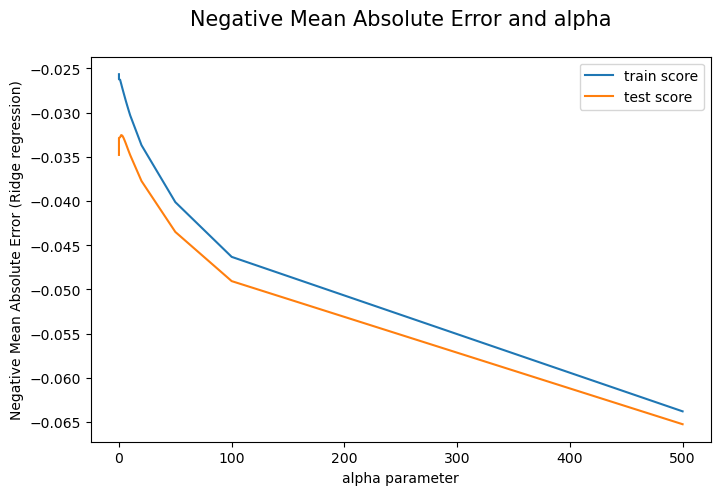

In [310]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [311]:
ridge_model_cv.best_params_

{'alpha': 2.0}

In [312]:
# Hyperparameter lambda = 1.0
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-3.17967610e-02,  9.05550045e-03,  5.92916073e-02,  1.25994270e-01,
        8.23833285e-02,  5.66514512e-02,  1.33500387e-02,  2.17262430e-02,
        6.10451525e-02,  1.15644383e-01, -7.38646114e-03,  2.53576475e-02,
        3.81058198e-02,  3.15312741e-02,  2.15422429e-02,  1.51334995e-03,
        3.03515453e-03,  1.30698577e-01,  3.64390139e-02,  3.17612274e-02,
       -5.73952915e-02, -1.21580659e-02, -2.29842705e-02,  3.30642886e-02,
       -2.83980346e-03,  2.41469009e-02,  6.49594042e-03, -9.84399051e-04,
       -7.08506229e-03,  3.88540731e-04,  1.55933584e-02, -1.93308154e-02,
       -4.78875346e-03,  1.23594188e-02, -1.82363409e-02, -1.17111022e-02,
       -1.10297794e-03,  0.00000000e+00,  1.28597548e-02,  1.21686577e-02,
       -2.15583638e-02, -2.01707566e-02,  4.79498774e-02, -3.43749938e-02,
       -2.91309979e-02, -1.41715883e-04, -3.04630039e-03, -3.85114187e-02,
       -2.51551627e-02,  2.00374655e-02, -2.48499063e-02,  1.38714458e-02,
        4.02095549e-02, -

In [313]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, ridge.predict(X_test))
mse

0.002973455609083693

In [314]:
# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.9302888220931927

In [316]:
#predicting the R2 value of test data
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test

0.896224463327002

In [366]:
# Lets observe the porameters by changing +1 and -1 of the alpha value
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("alpha=1")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("mse ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2 test",r2_test)
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("alpha=2")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("mse",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2 test",r2_test)
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("alpha=3")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("mse",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2 test",r2_test)

alpha=1
mse  0.0029871558953406528
r2 0.927529179409694
r2 test 0.9028162866777872
alpha=2
mse 0.002973455609083693
r2 0.927529179409694
r2 test 0.9028162866777872
alpha=3
mse 0.002992965519536924
r2 0.927529179409694
r2 test 0.9028162866777872


In [319]:
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0335
1              LotFrontage       0.0114
2                  LotArea       0.0556
3              OverallQual       0.1177
4              OverallCond       0.0762
5                YearBuilt       0.0517
6               MasVnrArea       0.0151
7                BsmtUnfSF       0.0220
8              TotalBsmtSF       0.0593
9                GrLivArea       0.1089
10            BedroomAbvGr      -0.0039
11            TotRmsAbvGrd       0.0288
12              Fireplaces       0.0399
13              GarageCars       0.0316
14              GarageArea       0.0242
15                  MoSold       0.0018
16                  YrSold       0.0030
17       Total_sqr_footage       0.1259
18         Total_Bathrooms       0.0373
19          Total_porch_sf       0.0323
20               Total_Age      -0.0524
21              Garage_age      -0.0123
22             Remodel_age      -0.0248
23             MSZoning_FV       0.0288
24             MSZoning_RH      -0.0047
25             MSZoning_RL       0.0224
26             MSZoning_RM       0.0041
27            LotShape_IR2       0.0000
28            LotShape_IR3      -0.0058
29            LotShape_Reg      -0.0001
30         LandContour_HLS       0.0164
31         LandContour_Low      -0.0171
32         LandContour_Lvl      -0.0043
33       LotConfig_CulDSac       0.0134
34           LotConfig_FR2      -0.0175
35           LotConfig_FR3      -0.0090
36        LotConfig_Inside      -0.0010
37    Neighborhood_Blueste       0.0000
38     Neighborhood_BrDale       0.0111
39    Neighborhood_BrkSide       0.0122
40    Neighborhood_ClearCr      -0.0189
41    Neighborhood_CollgCr      -0.0193
42    Neighborhood_Crawfor       0.0473
43    Neighborhood_Edwards      -0.0332
44    Neighborhood_Gilbert      -0.0280
45     Neighborhood_IDOTRR      -0.0018
46    Neighborhood_MeadowV      -0.0054
47    Neighborhood_Mitchel      -0.0365
48      Neighborhood_NAmes      -0.0241
49    Neighborhood_NPkVill       0.0175
50     Neighborhood_NWAmes      -0.0218
51    Neighborhood_NoRidge       0.0135
52    Neighborhood_NridgHt       0.0403
53    Neighborhood_OldTown      -0.0123
54      Neighborhood_SWISU      -0.0153
55     Neighborhood_Sawyer      -0.0139
56    Neighborhood_SawyerW       0.0006
57    Neighborhood_Somerst       0.0166
58    Neighborhood_StoneBr       0.0846
59     Neighborhood_Timber      -0.0186
60    Neighborhood_Veenker       0.0108
61        Condition1_Feedr       0.0046
62         Condition1_Norm       0.0221
63         Condition1_PosA       0.0032
64         Condition1_PosN       0.0355
65         Condition1_RRAe      -0.0315
66         Condition1_RRAn       0.0030
67         Condition1_RRNe      -0.0006
68         Condition1_RRNn       0.0124
69         BldgType_2fmCon      -0.0065
70         BldgType_Duplex      -0.0242
71          BldgType_Twnhs      -0.0335
72         BldgType_TwnhsE      -0.0243
73       HouseStyle_1.5Unf       0.0013
74       HouseStyle_1Story      -0.0030
75       HouseStyle_2.5Fin       0.0023
76       HouseStyle_2.5Unf      -0.0121
77       HouseStyle_2Story      -0.0003
78       HouseStyle_SFoyer      -0.0062
79         HouseStyle_SLvl      -0.0054
80         RoofStyle_Gable       0.0055
81       RoofStyle_Gambrel       0.0213
82           RoofStyle_Hip       0.0085
83       RoofStyle_Mansard       0.0126
84          RoofStyle_Shed      -0.0105
85     Exterior1st_AsphShn      -0.0045
86     Exterior1st_BrkComm      -0.0022
87     Exterior1st_BrkFace       0.0372
88      Exterior1st_CBlock      -0.0038
89     Exterior1st_CemntBd      -0.0091
90     Exterior1st_HdBoard      -0.0139
91     Exterior1st_ImStucc       0.0042
92     Exterior1st_MetalSd       0.0011
93     Exterior1st_Plywood      -0.0067
94       Exterior1st_Stone       0.0000
95      Exterior1st_Stucco       0.0152
96     Exterior1st_VinylSd      -0.0130
97     Exterior1st_Wd Sdng      -0.0138
98     Exterior1st_WdShing      -0.0022
99     Exterior2nd

In [326]:

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0335,
 'LotFrontage': 0.0114,
 'LotArea': 0.0556,
 'OverallQual': 0.1177,
 'OverallCond': 0.0762,
 'YearBuilt': 0.0517,
 'MasVnrArea': 0.0151,
 'BsmtUnfSF': 0.022,
 'TotalBsmtSF': 0.0593,
 'GrLivArea': 0.1089,
 'BedroomAbvGr': -0.0039,
 'TotRmsAbvGrd': 0.0288,
 'Fireplaces': 0.0399,
 'GarageCars': 0.0316,
 'GarageArea': 0.0242,
 'MoSold': 0.0018,
 'YrSold': 0.003,
 'Total_sqr_footage': 0.1259,
 'Total_Bathrooms': 0.0373,
 'Total_porch_sf': 0.0323,
 'Total_Age': -0.0524,
 'Garage_age': -0.0123,
 'Remodel_age': -0.0248,
 'MSZoning_FV': 0.0288,
 'MSZoning_RH': -0.0047,
 'MSZoning_RL': 0.0224,
 'MSZoning_RM': 0.0041,
 'LotShape_IR2': 0.0,
 'LotShape_IR3': -0.0058,
 'LotShape_Reg': -0.0001,
 'LandContour_HLS': 0.0164,
 'LandContour_Low': -0.0171,
 'LandContour_Lvl': -0.0043,
 'LotConfig_CulDSac': 0.0134,
 'LotConfig_FR2': -0.0175,
 'LotConfig_FR3': -0.009,
 'LotConfig_Inside': -0.001,
 'Neighborhood_Blueste': 0.0,
 'Neighborhood_BrDale': 0.0111,
 'Neighborhood_BrkSide': 0.

In [322]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [327]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
0         OverallQual         True            1       0.1177
2         TotalBsmtSF         True            1       0.0593
1           YearBuilt         True            1       0.0517
18      GarageQual_TA         True            1       0.0090
16      GarageQual_Gd         True            1       0.0078
3              YrSold         True            1       0.0030
14  GarageFinish_none         True            1       0.0017
13    GarageType_none         True            1       0.0017
19    GarageQual_none         True            1       0.0017
9   Exterior2nd_Other         True            1       0.0000

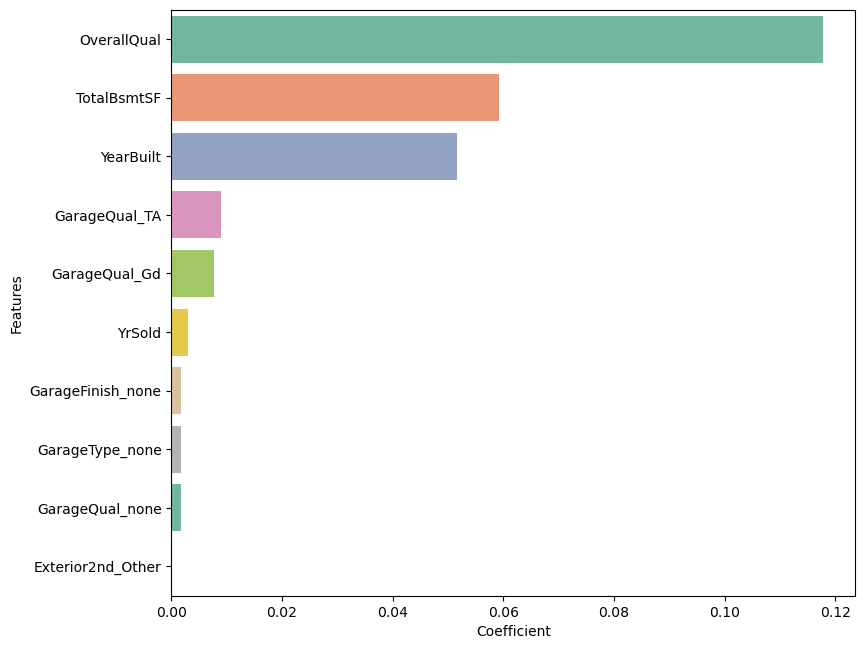

In [365]:
# bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

### Lasso - Regularization

In [364]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [331]:

# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.027405        -0.032575                1
1       0.0002         -0.028461        -0.032893                2
2       0.0003         -0.029389        -0.033556                3
3       0.0004         -0.030157        -0.034203                4
4       0.0005         -0.030912        -0.034915                5
5        0.001         -0.034779        -0.038536                6
6        0.002         -0.040724        -0.043832                7
7        0.003         -0.045163        -0.047623                8
8        0.004         -0.049239        -0.051493                9
9        0.005         -0.052935        -0.054948               10
10        0.01         -0.067638        -0.068908               11

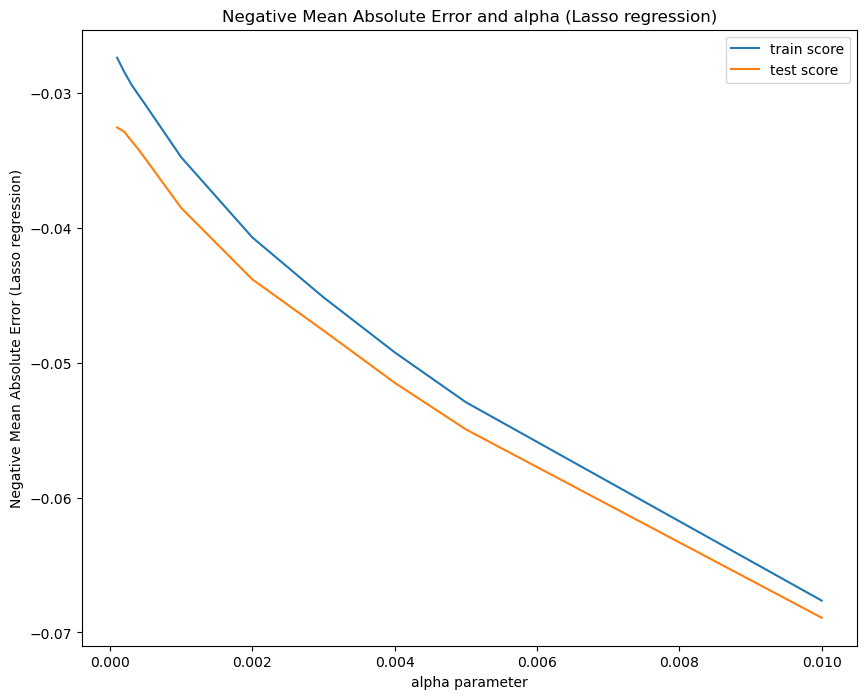

In [333]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [334]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [335]:
# # Hyperparameter lambda = 0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-4.13091980e-02,  2.39712536e-03,  5.98224831e-02,  1.63094346e-01,
        9.45851168e-02,  1.34530587e-01,  8.50328403e-03,  0.00000000e+00,
        9.23422738e-02,  1.54868528e-01, -0.00000000e+00,  0.00000000e+00,
        3.28587048e-02,  3.99528716e-02,  5.35002687e-03, -0.00000000e+00,
        5.80287919e-04,  1.18840756e-01,  2.00076230e-02,  3.04017317e-02,
       -0.00000000e+00, -1.14126555e-02, -1.92698658e-02,  2.42601692e-02,
       -1.93002871e-03,  1.64501884e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.68131827e-04,  1.39926045e-02, -1.04899681e-02,
       -0.00000000e+00,  1.16597554e-02, -1.31256794e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.21374220e-02,
       -1.04611187e-02, -1.57469795e-02,  4.99967554e-02, -2.76817934e-02,
       -2.27548023e-02,  0.00000000e+00,  0.00000000e+00, -3.83575584e-02,
       -2.18812123e-02,  8.86479383e-03, -2.23855579e-02,  7.55413116e-03,
        4.25988667e-02, -

In [363]:
# mse
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
mse

0.0027974117165619

In [362]:
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.927529179409694

In [357]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test

0.9028162866777872

In [342]:
# house_pricing_lasso: Features and coefficienst of Lasso

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0               MSSubClass      -0.0413
1              LotFrontage       0.0024
2                  LotArea       0.0598
3              OverallQual       0.1631
4              OverallCond       0.0946
5                YearBuilt       0.1345
6               MasVnrArea       0.0085
7              TotalBsmtSF       0.0923
8                GrLivArea       0.1549
9               Fireplaces       0.0329
10              GarageCars       0.0400
11              GarageArea       0.0054
12                  YrSold       0.0006
13       Total_sqr_footage       0.1188
14         Total_Bathrooms       0.0200
15          Total_porch_sf       0.0304
16              Garage_age      -0.0114
17             Remodel_age      -0.0193
18             MSZoning_FV       0.0243
19             MSZoning_RH      -0.0019
20             MSZoning_RL       0.0165
21            LotShape_Reg       0.0003
22         LandContour_HLS       0.0140
23         LandContour_Low      -0.0105
24       LotConfig_CulDSac       0.0117
25           LotConfig_FR2      -0.0131
26    Neighborhood_BrkSide       0.0121
27    Neighborhood_ClearCr      -0.0105
28    Neighborhood_CollgCr      -0.0157
29    Neighborhood_Crawfor       0.0500
30    Neighborhood_Edwards      -0.0277
31    Neighborhood_Gilbert      -0.0228
32    Neighborhood_Mitchel      -0.0384
33      Neighborhood_NAmes      -0.0219
34    Neighborhood_NPkVill       0.0089
35     Neighborhood_NWAmes      -0.0224
36    Neighborhood_NoRidge       0.0076
37    Neighborhood_NridgHt       0.0426
38    Neighborhood_OldTown      -0.0115
39      Neighborhood_SWISU      -0.0084
40     Neighborhood_Sawyer      -0.0110
41    Neighborhood_Somerst       0.0160
42    Neighborhood_StoneBr       0.0970
43     Neighborhood_Timber      -0.0109
44         Condition1_Norm       0.0172
45         Condition1_PosN       0.0309
46         Condition1_RRAe      -0.0406
47         BldgType_Duplex      -0.0219
48          BldgType_Twnhs      -0.0291
49         BldgType_TwnhsE      -0.0187
50       HouseStyle_1Story      -0.0022
51       HouseStyle_2.5Unf      -0.0053
52       RoofStyle_Gambrel       0.0163
53       RoofStyle_Mansard       0.0003
54     Exterior1st_BrkFace       0.0373
55     Exterior1st_HdBoard      -0.0094
56     Exterior1st_MetalSd       0.0010
57     Exterior1st_Plywood      -0.0003
58      Exterior1st_Stucco       0.0066
59     Exterior1st_Wd Sdng      -0.0051
60     Exterior2nd_BrkFace      -0.0132
61     Exterior2nd_CmentBd       0.0163
62     Exterior2nd_HdBoard      -0.0003
63     Exterior2nd_Plywood      -0.0135
64     Exterior2nd_Wd Sdng       0.0036
65     Exterior2nd_Wd Shng      -0.0128
66      MasVnrType_BrkFace       0.0082
67         MasVnrType_None       0.0036
68        MasVnrType_Stone       0.0129
69         MasVnrType_none      -0.0069
70            ExterQual_Fa      -0.0018
71            ExterQual_Gd      -0.0072
72            ExterQual_TA      -0.0162
73            ExterCond_Fa       0.0008
74            ExterCond_Gd      -0.0126
75        Foundation_PConc       0.0070
76             BsmtQual_Fa      -0.0295
77             BsmtQual_Gd      -0.0504
78             BsmtQual_TA      -0.0408
79             BsmtCond_Gd       0.0039
80             BsmtCond_TA       0.0143
81         BsmtExposure_Gd       0.0368
82         BsmtExposure_Mn      -0.0029
83         BsmtExposure_No      -0.0069
84       BsmtExposure_none      -0.0096
85        BsmtFinType1_BLQ      -0.0027
86        BsmtFinType1_GLQ       0.0105
87        BsmtFinType1_LwQ      -0.0224
88        BsmtFinType1_Rec      -0.0056
89        BsmtFinType2_BLQ       0.0031
90        BsmtFinType2_LwQ      -0.0072
91        BsmtFinType2_Rec      -0.0091
92        BsmtFinType2_Unf       0.0097
93            HeatingQC_Gd      -0.0089
94            HeatingQC_TA      -0.0063
95          KitchenQual_Fa      -0.0301
96          KitchenQual_Gd      -0.0444
97          KitchenQual_TA      -0.0427
98      GarageType_BuiltIn       0.0008
99      GarageType

In [343]:
# dictionary of Features and Coefficients

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.04130919804605712,
 'LotFrontage': 0.0023971253626539533,
 'LotArea': 0.05982248308481473,
 'OverallQual': 0.163094346122363,
 'OverallCond': 0.09458511678744744,
 'YearBuilt': 0.13453058691029693,
 'MasVnrArea': 0.00850328403043535,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.09234227380381846,
 'GrLivArea': 0.15486852784997107,
 'BedroomAbvGr': -0.0,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.03285870476756264,
 'GarageCars': 0.03995287156697258,
 'GarageArea': 0.005350026866681251,
 'MoSold': -0.0,
 'YrSold': 0.0005802879191787189,
 'Total_sqr_footage': 0.11884075634936948,
 'Total_Bathrooms': 0.020007623025693037,
 'Total_porch_sf': 0.03040173169826192,
 'Total_Age': -0.0,
 'Garage_age': -0.0114126554510747,
 'Remodel_age': -0.01926986583780957,
 'MSZoning_FV': 0.024260169185170887,
 'MSZoning_RH': -0.00193002871114486,
 'MSZoning_RL': 0.016450188359728193,
 'MSZoning_RM': 0.0,
 'LotShape_IR2': -0.0,
 'LotShape_IR3': -0.0,
 'LotShape_Reg': 0.00026813182657702304,
 'LandConto

In [344]:
# RFE : minimising features to 20

X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [345]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
1            OverallQual         True            1     0.163094
5              GrLivArea         True            1     0.154869
3              YearBuilt         True            1     0.134531
7      Total_sqr_footage         True            1     0.118841
11  Neighborhood_StoneBr         True            1     0.096971
2            OverallCond         True            1     0.094585
4            TotalBsmtSF         True            1     0.092342
0                LotArea         True            1     0.059822
8   Neighborhood_Crawfor         True            1     0.049997
10  Neighborhood_NridgHt         True            1     0.042599

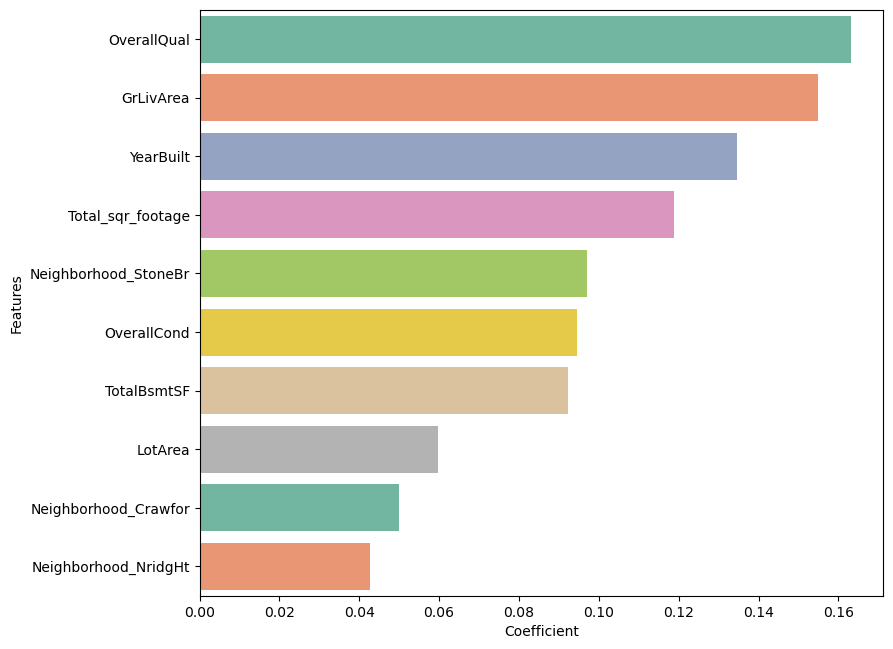

In [356]:
#  bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp2_df)
plt.show()

In [353]:
#lets predict the R-squared value of test
y_test_pred = lasso.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.9028162866777872

In [354]:
# mse
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
mse

0.0027974117165619

- We can clearly observe that the Mean Squared Error of Lasso is slightly lower than that of Ridge.
- Also since Lasso helps in feature reduction (as the coefficient value of one of the lasso's feature to be shrunk toward 0) and helps to increase model interpretation by taking the magnitude of the coefficients thus **Lasso has a better edge over Ridge.**

Lassa Regularization the Predicted variables are :

1. **OverallQual** - With the increase of the overall material and finish of the house, the house price also increases.
2. **GrLivArea** - With the increase of size of the living area square feet, the house price also increases.
3. **YearBuild** - With the increase of age of the house, the price gradually increases. 
4. **Total_sqr_footage** - With the increase of the overall square feet of the house, the house price also increases.
5. **Neighborhood_StoneBr** - Depending upon the Stone Brook location, the house price also increases.

### Assignment Part 2

In [376]:
#Lets find for Ridge first
alpha = 2.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("alpha=2")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("mse",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2 test",r2_test)

alpha = 4.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("alpha=4")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("mse",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2 test",r2_test)

alpha=2
mse 0.002973455609083693
r2 0.9227869910665728
r2 test 0.8861199884232901
alpha=4
mse 0.003026768161885163
r2 0.9227869910665728
r2 test 0.8861199884232901


In [377]:
#Let's create a ridge model with alpha  = 4.0
ridge_doubled = Ridge(alpha = 4.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)

ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10)

Coefficient
Total_sqr_footage        0.121636
OverallQual              0.111001
GrLivArea                0.103918
Neighborhood_StoneBr     0.080427
OverallCond              0.071092
TotalBsmtSF              0.057602
LotArea                  0.052836
YearBuilt                0.047895
Neighborhood_Crawfor     0.046547
Fireplaces               0.041275

In [378]:
#Now lets calculate for Lasso
alpha = 0.0001 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("alpha=0.0001")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("mse",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2 test",r2_test)
alpha = 0.0002 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("alpha=0.0002")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("mse",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2 test",r2_test)

alpha=0.0001
mse 0.0027974117165619
r2 0.927529179409694
r2 test 0.9028162866777872
alpha=0.0002
mse 0.0032780109729978755
r2 0.9227869910665728
r2 test 0.8861199884232901


In [381]:
#Let's create a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10)

Coefficient
Total_sqr_footage        0.185432
OverallQual              0.172690
YearBuilt                0.119993
GrLivArea                0.105463
Neighborhood_StoneBr     0.093874
OverallCond              0.089137
LotArea                  0.054712
Neighborhood_Crawfor     0.053322
Neighborhood_NridgHt     0.047466
GarageCars               0.044402

In [383]:
#dropping the top 5 most important predictor variables in the lasso model 
drop_cols = ['OverallQual','GrLivArea','YearBuilt','Total_sqr_footage','Neighborhood_StoneBr']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)
X_train.shape

KeyError: "['OverallQual', 'GrLivArea', 'YearBuilt', 'Total_sqr_footage', 'Neighborhood_StoneBr'] not found in axis"

In [385]:
X_test.shape

(388, 183)

In [386]:
#Let's create a lasso model with alpha  = 0.0001
lasso_doubled = Lasso(alpha=0.0001)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(5)

Coefficient
TotalBsmtSF         0.322970
TotRmsAbvGrd        0.126251
OverallCond         0.094274
Total_Bathrooms     0.086846
LotArea             0.067737